In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fraud_df = pd.read_csv("C:/Users/Hp Pc/Downloads/fraud_detection_bank.csv", index_col=[0])

In [3]:
fraud_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,9,1354,0,18,0,1,7,9,0,0,...,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,0,0,...,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,17,0,0,...,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,1,0,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,0,134,0,2,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,4,393,1,1,0,0,-1,4,0,0,...,0,1,0,0,0,0,0,0,45,0
20466,0,10,0,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [4]:
fraud_df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9',
       ...
       'col_103', 'col_104', 'col_105', 'col_106', 'col_107', 'col_108',
       'col_109', 'col_110', 'col_111', 'targets'],
      dtype='object', length=113)

This dataset has 111 columns which are transaction data that has been transformed through PCA.
This was done for the security of the transaction details while preserving the details in a decomposed format.

In [5]:
target_distribution = fraud_df['targets'].value_counts()

print(target_distribution)
print(target_distribution/fraud_df.shape[0])

#the dataset is greatly imbalanced

targets
0    15030
1     5438
Name: count, dtype: int64
targets
0    0.734317
1    0.265683
Name: count, dtype: float64


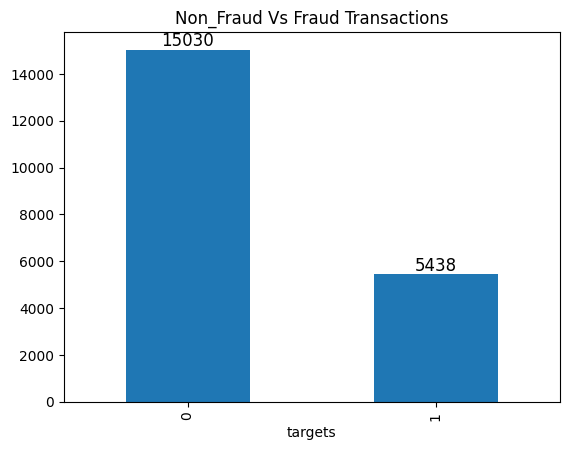

In [6]:
ax = target_distribution.plot(kind='bar', title='Non_Fraud Vs Fraud Transactions')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

UNDERSAMPLING: Refitting the Dataset

In [7]:
#custom random under sampling

fraud = fraud_df[fraud_df['targets'] == 1].sample(5400, random_state=42)
non_fraud = fraud_df[fraud_df['targets'] == 0].sample(5400, random_state=42)

fraud_df = pd.concat([fraud,non_fraud]).sample(frac=1, random_state=42)
fraud_df.reset_index(drop=True,inplace=True)

In [8]:
fraud_df.shape

(10800, 113)

In [9]:
fraud_df.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,55,3,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,45,1
1,16,1697,0,0,0,3,2,16,0,0,...,0,1,0,1,1,0,0,0,81,0
2,0,45,0,0,0,1,2,0,0,0,...,0,1,0,0,0,0,0,0,97,1
3,1,179,1,0,0,0,-1,1,0,0,...,0,0,0,1,0,0,0,0,12,0
4,2,227,0,1,0,3,0,2,0,0,...,0,0,0,1,0,0,1,0,63,0
5,0,55,0,1,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,55,1
6,0,80,0,0,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,242,1
7,0,138,0,0,0,4,-1,0,0,0,...,0,1,0,0,0,0,0,0,58,1
8,0,46,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,87,1
9,0,46,0,0,0,1,2,0,0,0,...,0,1,0,0,0,0,0,0,51,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
col_with_high_num = []

for col in fraud_df.columns:
    if (fraud_df[col] >= 5).any():
        col_with_high_num.append(col)


In [12]:
#at face glance it looks like the dataset comprise of 0s,1s and 2s but
#Several columns contain higher ranges of numbers; so the need to standardize

len(col_with_high_num)

55

In [13]:
max_values = fraud_df.max()

min_values = fraud_df.min()

print(f"Maximum values in each row: ", list(max_values))

Maximum values in each row:  [2301.0, 37808.0, 201.0, 360.0, 54.0, 144.0, 8.0, 2301.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 637973.0, 0.0, 0.0, 0.0, 0.0, 3349.0, 11480.0, 360.0, 544.0, 167.0, 18.0, 1.0, 203.0, 973.0, 117.0, 378.0, 9.0, 857.0, 0.0, 94642.0, 5054.0, 73318.0, 9.0, 724.0, 181.0, 6332.0, 297.0, 349.0, 46.0, 69.0, 95635.0, 4565.0, 41900.0, 291269.0, 0.0, 0.0, 0.0, 121855.0, 72763.0, 2181.0, 202040.0, 102.0, 130.0, 6325.0, 165.0, 347.0, 156330.0, 3642.0, 29269.0, 18382.0, 23066577.0909, 1542.0, 26.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 17.0, 747.0, 1.0]


(array([  0.5,   3.5,   6.5,   9.5,  12.5,  15.5,  18.5,  21.5,  24.5,
         27.5,  30.5,  33.5,  36.5,  39.5,  42.5,  45.5,  48.5,  51.5,
         54.5,  57.5,  60.5,  63.5,  66.5,  69.5,  72.5,  75.5,  78.5,
         81.5,  84.5,  87.5,  90.5,  93.5,  96.5,  99.5, 102.5, 105.5,
        108.5, 111.5]),
 [Text(0, 0.5, 'col_0'),
  Text(0, 3.5, 'col_3'),
  Text(0, 6.5, 'col_6'),
  Text(0, 9.5, 'col_9'),
  Text(0, 12.5, 'col_12'),
  Text(0, 15.5, 'col_15'),
  Text(0, 18.5, 'col_18'),
  Text(0, 21.5, 'col_21'),
  Text(0, 24.5, 'col_24'),
  Text(0, 27.5, 'col_27'),
  Text(0, 30.5, 'col_30'),
  Text(0, 33.5, 'col_33'),
  Text(0, 36.5, 'col_36'),
  Text(0, 39.5, 'col_39'),
  Text(0, 42.5, 'col_42'),
  Text(0, 45.5, 'col_45'),
  Text(0, 48.5, 'col_48'),
  Text(0, 51.5, 'col_51'),
  Text(0, 54.5, 'col_54'),
  Text(0, 57.5, 'col_57'),
  Text(0, 60.5, 'col_60'),
  Text(0, 63.5, 'col_63'),
  Text(0, 66.5, 'col_66'),
  Text(0, 69.5, 'col_69'),
  Text(0, 72.5, 'col_72'),
  Text(0, 75.5, 'col_75')

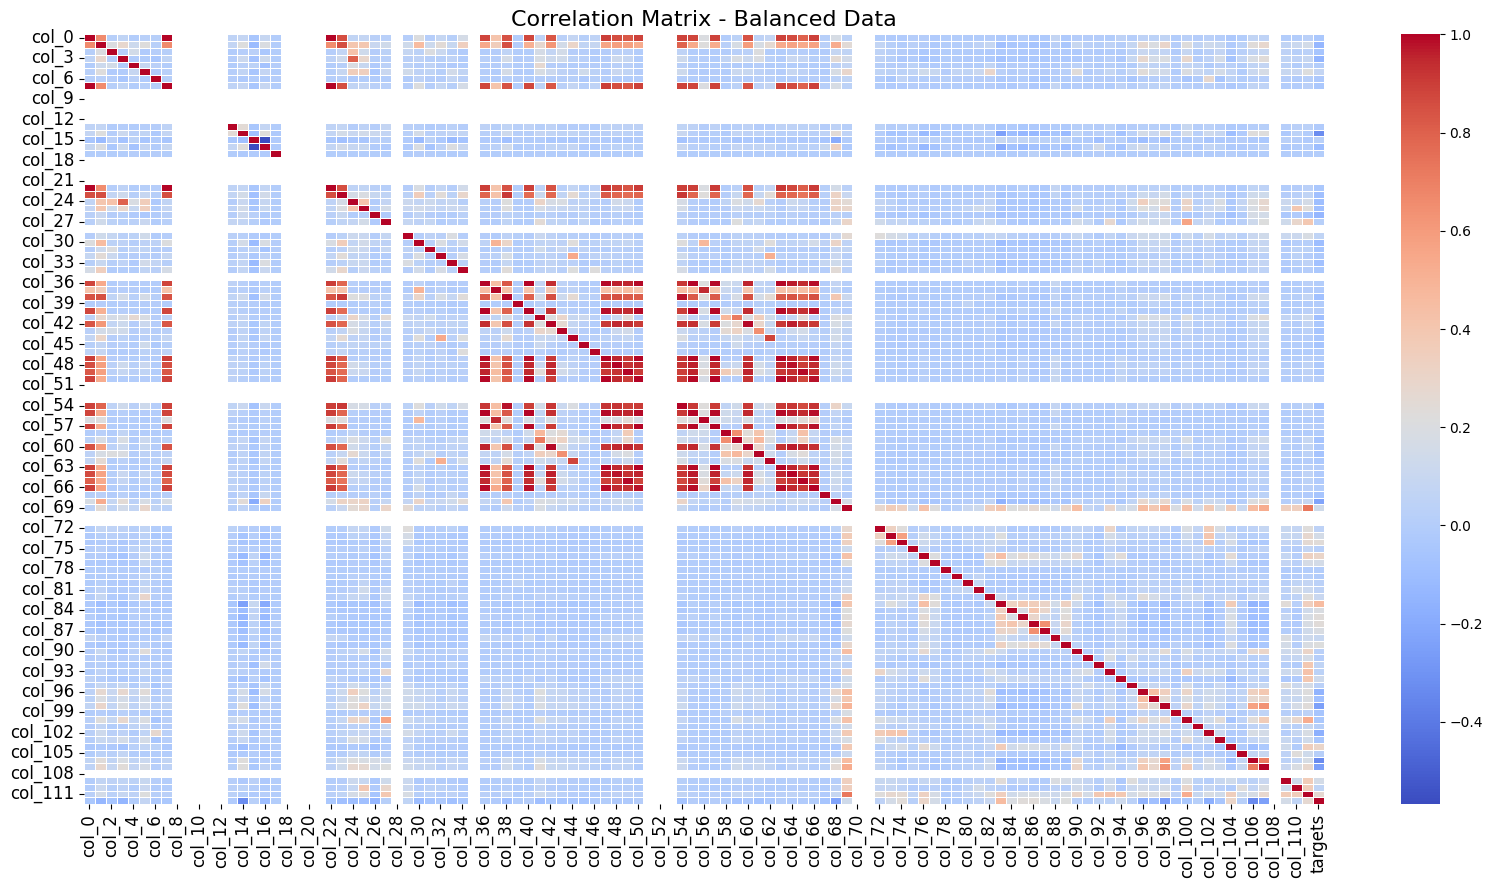

In [14]:
data_correlation = fraud_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(data_correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix - Balanced Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#113 columns are too much to contain in the Heatmap

MODELLING

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

In [16]:
x = fraud_df.drop('targets', axis=1)
y = fraud_df['targets']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [18]:
#define the models
models = {
    "SVC": LinearSVC(random_state=2),
    "Regression": LogisticRegression(random_state=2),
    "Random Forest": RandomForestClassifier(random_state=2),
    "Neighbors": KNeighborsClassifier(),
    "Light GBM": lgb.LGBMClassifier(random_state=2),
    "Naive Bayes": GaussianNB()
    
}

#fit the training set to the models in loop
#cross-validate each model's score

models_training_score = []
for name, model in models.items():
    model.fit(x_train,y_train)
    training_score = cross_val_score(model,x_train,y_train)
    models_training_score.append({
        "model": name,
        "score": round(training_score.mean(),3)*100})
    #f'{name}_preds' = model.predict(x_test)
    #testing_score = model.score(y_test,f'{name}_preds')
    #print("Model: ",  name, "has training accuracy of: ", round(training_score.mean(),3)*100,"%")

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python3

[LightGBM] [Info] Number of positive: 3816, number of negative: 3744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4483
[LightGBM] [Info] Number of data points in the train set: 7560, number of used features: 90
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504762 -> initscore=0.019048
[LightGBM] [Info] Start training from score 0.019048
[LightGBM] [Info] Number of positive: 3052, number of negative: 2996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 6048, number of used features: 89
[LightGBM] [Info] [binary:

In [19]:
models_training_score

#Light GBM has the highest training score while

[{'model': 'SVC', 'score': 73.6},
 {'model': 'Regression', 'score': 64.9},
 {'model': 'Random Forest', 'score': 91.10000000000001},
 {'model': 'Neighbors', 'score': 77.2},
 {'model': 'Light GBM', 'score': 92.60000000000001},
 {'model': 'Naive Bayes', 'score': 50.3}]

HYPERPARAMETER TUNING

In [20]:
tuned_models_score = []

# Hyperparameter tuning for Logistic Regression
reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'max_iter': [100,150,200,300]}
grid_log_reg = GridSearchCV(LogisticRegression(), reg_params)
grid_log_reg.fit(x_train, y_train)
log_reg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(log_reg, x_train,y_train, cv=5)

# Hyperparameter tuning for K-Nearest Neighbors (KNN)
knears_params = {"n_neighbors": [2,3,5,7,10], 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [20,30,50,70]}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train,y_train)
knears_neighbors = grid_knears.best_estimator_
knears_score = cross_val_score(knears_neighbors, x_train,y_train, cv=5)

# Hyperparameter tuning for Support Vector Classifier (SVC)
svc_params = {'C': [0.5, 0.7, 1,10], 
              'max_iter': [500,700,1000,1500]}
grid_svc = GridSearchCV(LinearSVC(), svc_params)
grid_svc.fit(x_train,y_train)
svc = grid_svc.best_estimator_
svc_score = cross_val_score(svc, x_train,y_train, cv=5)

# Hyperparameter tuning for Random Forest Classifier
rfc_params = {"criterion": ["gini", "entropy"], 
              "max_depth": list(range(2, 10, 1)), 
              "min_samples_leaf": list(range(5, 10, 1)),
             "min_samples_split": list(range(5,10,1))}
grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params, n_jobs=-1)
grid_rfc.fit(x_train,y_train)
rfc_clf = grid_rfc.best_estimator_
rfc_score = cross_val_score(rfc_clf, x_train,y_train, cv=5)

# Hyperparameter tuning for LightGBM Classifier
lgb_params = {'num_leaves': [31, 50,70], 
              'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [100, 200,500]}
grid_lgb = GridSearchCV(lgb.LGBMClassifier(), lgb_params, n_jobs=-1)
grid_lgb.fit(x_train,y_train)
lgb_clf = grid_lgb.best_estimator_
lgb_score = cross_val_score(lgb_clf, x_train,y_train, cv=5)


tuned_models_score.append({
    'Logistic Regression cross-val-score': round(log_reg_score.mean(),2).astype(str) + '%',
    "KNN cross-val-score": round(knears_score.mean(),2).astype(str) + '%',
    "Random Forest cross-val-score": round(rfc_score.mean(),2).astype(str) + '%',
    "SVC cross-val-score": round(svc_score.mean(),2).astype(str) + '%', 
    "LightGBM cross-val-score": round(lgb_score.mean(),2).astype(str) + '%',
})

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[LightGBM] [Info] Number of positive: 3816, number of negative: 3744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4483
[LightGBM] [Info] Number of data points in the train set: 7560, number of used features: 90
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504762 -> initscore=0.019048
[LightGBM] [Info] Start training from score 0.019048
[LightGBM] [Info] Number of positive: 3052, number of negative: 2996
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 6048, number of used features: 89
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504630 -> initscore=0.018519
[LightGBM] 

In [21]:
tuned_models_score, models_training_score

#LightGBM and Random Forest remains the best performed models

([{'Logistic Regression cross-val-score': '0.69%',
   'KNN cross-val-score': '0.78%',
   'Random Forest cross-val-score': '0.9%',
   'SVC cross-val-score': '0.77%',
   'LightGBM cross-val-score': '0.93%'}],
 [{'model': 'SVC', 'score': 73.6},
  {'model': 'Regression', 'score': 64.9},
  {'model': 'Random Forest', 'score': 91.10000000000001},
  {'model': 'Neighbors', 'score': 77.2},
  {'model': 'Light GBM', 'score': 92.60000000000001},
  {'model': 'Naive Bayes', 'score': 50.3}])

FEATURE IMPORTANCE

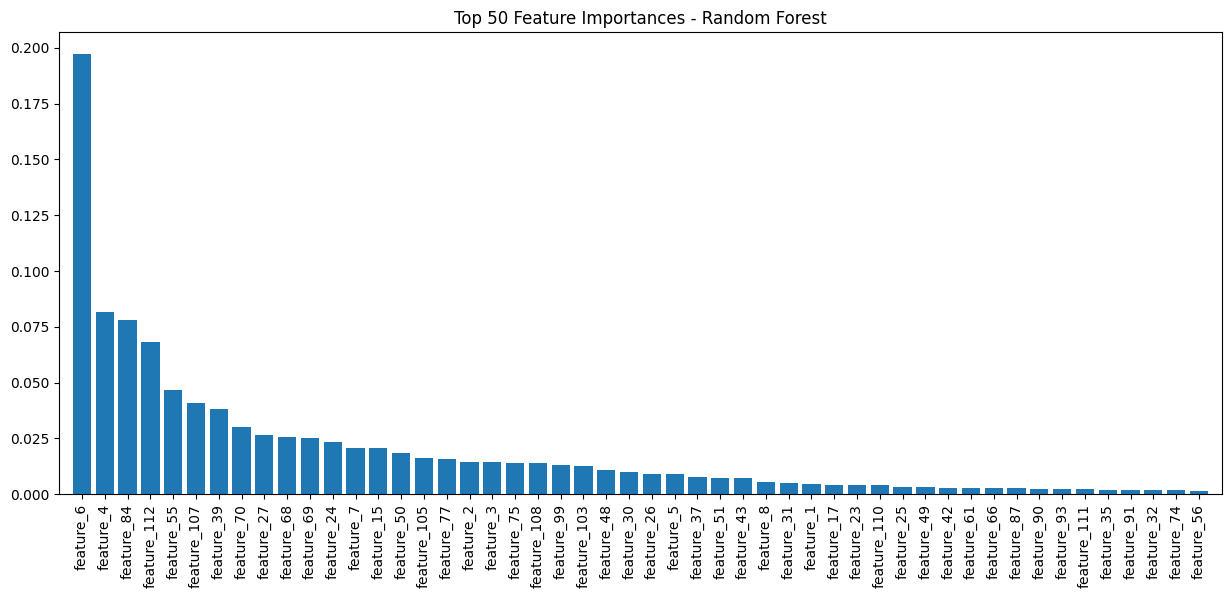

In [22]:
feature_names = [f'feature_{i+1}' for i in range(112)]

def plot_feature_importance(model, model_name, feature_names, top_n=50):
    feature_importances = model.feature_importances_
    
    if len(feature_importances) != len(feature_names):
        print(f"Error: Mismatch between feature importances and feature names lengths")
        print(f"Feature Importances Length: {len(feature_importances)}")
        print(f"Feature Names Length: {len(feature_names)}")
        return

    indices = np.argsort(feature_importances)[::-1]

    top_indices = indices[:top_n]
    
    plt.figure(figsize=(15, 6))
    plt.title(f"Top {top_n} Feature Importances - {model_name}")
    plt.bar(range(top_n), feature_importances[top_indices], align="center")
    plt.xticks(range(top_n), np.array(feature_names)[top_indices], rotation=90)
    plt.xlim([-1, top_n])
    plt.show()

# Plotting feature importance for RandomForestClassifier
plot_feature_importance(rfc_clf, "Random Forest", feature_names)

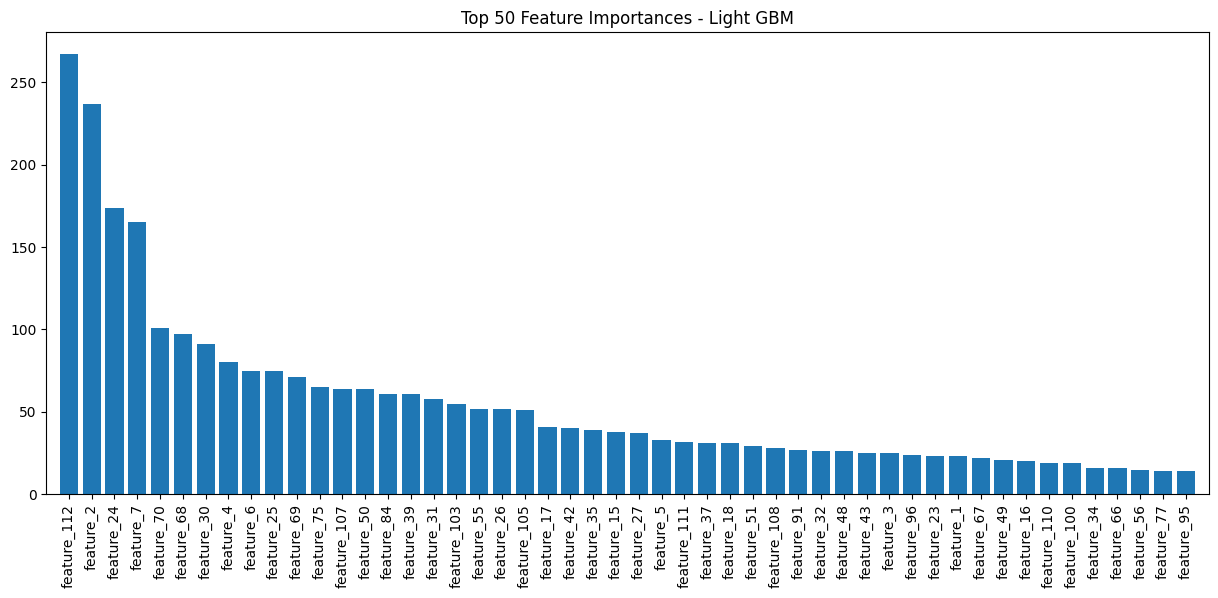

In [23]:
plot_feature_importance(lgb_clf,'Light GBM', feature_names)

PREDICTIONS AND METRICS

In [24]:
rfc_preds = rfc_clf.predict(x_test) #Random Forest Classifier from GridSearchEstimator
lgb_preds = lgb_clf.predict(x_test)  #LightGBM Classifier from  ''

In [25]:
from sklearn.metrics import f1_score,confusion_matrix,precision_score

Random Forest Precision:  0.9085009733939
Random Forest f1_score:  0.896


[Text(0.5, 0, 'No Fraud'), Text(1.5, 0, 'Fraud')]

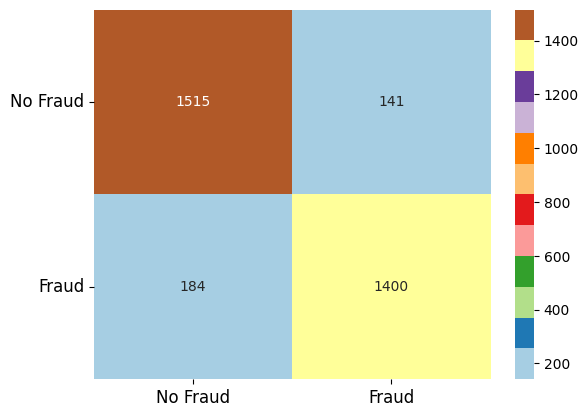

In [26]:
print(f"Random Forest Precision: ", precision_score(y_test,rfc_preds))
print(f"Random Forest f1_score: ", f1_score(y_test,rfc_preds))

rfc_report = confusion_matrix(y_test,rfc_preds)
ax = sns.heatmap(rfc_report,annot=True, cmap='Paired', fmt='g')
ax.set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax.set_xticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=0)

In [27]:
rfc_report

array([[1515,  141],
       [ 184, 1400]], dtype=int64)

LightGBM Precision:  0.9181875393329137
LightGBM f1_score:  0.9196344153797668


[Text(0.5, 0, 'No Fraud'), Text(1.5, 0, 'Fraud')]

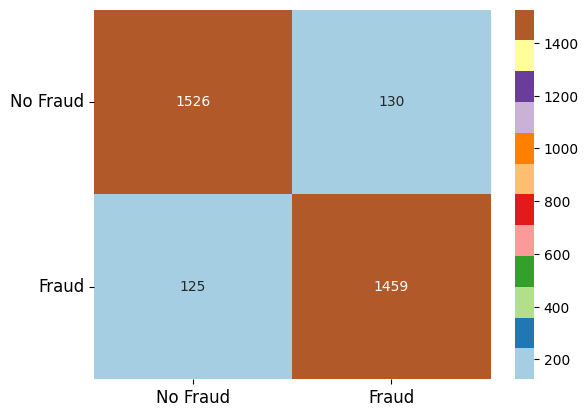

In [28]:
print(f"LightGBM Precision: ", precision_score(y_test,lgb_preds))
print(f"LightGBM f1_score: ", f1_score(y_test,lgb_preds))

lgb_report = confusion_matrix(y_test,lgb_preds)
ax = sns.heatmap(lgb_report,annot=True, fmt='g', cmap='Paired')
ax.set_yticklabels(["No Fraud", "Fraud"], fontsize=12, rotation=0)
ax.set_xticklabels(['No Fraud', 'Fraud'], fontsize=12, rotation=0)

In [29]:
lgb_report

#LightGBM is a bit better at capturing Fraudulent transactions

array([[1526,  130],
       [ 125, 1459]], dtype=int64)

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

In [31]:
fraud_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,55,3,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,45,1
1,16,1697,0,0,0,3,2,16,0,0,...,0,1,0,1,1,0,0,0,81,0
2,0,45,0,0,0,1,2,0,0,0,...,0,1,0,0,0,0,0,0,97,1
3,1,179,1,0,0,0,-1,1,0,0,...,0,0,0,1,0,0,0,0,12,0
4,2,227,0,1,0,3,0,2,0,0,...,0,0,0,1,0,0,1,0,63,0


In [32]:
#standardized data

standardize = MinMaxScaler()

stand_fraud = standardize.fit_transform(fraud_df.drop('targets', axis=1)) 
#transform only the predictors

In [33]:
feature_index = fraud_df.drop('targets', axis=1).index
feature_column = fraud_df.drop('targets', axis=1).columns

stand_fraud = pd.DataFrame(stand_fraud,index = feature_index, columns=feature_column)

In [34]:
stand_fraud.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
0,0.000000,0.001455,0.014925,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.0,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060241
1,0.006953,0.044885,0.000000,0.000000,0.0,0.020833,0.333333,0.006953,0.0,0.0,...,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.108434
2,0.000000,0.001190,0.000000,0.000000,0.0,0.006944,0.333333,0.000000,0.0,0.0,...,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129853
3,0.000435,0.004734,0.004975,0.000000,0.0,0.000000,0.000000,0.000435,0.0,0.0,...,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.016064
4,0.000869,0.006004,0.000000,0.002778,0.0,0.020833,0.111111,0.000869,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.084337


In [35]:
stand_fraud.max()

col_0      1.0
col_1      1.0
col_2      1.0
col_3      1.0
col_4      1.0
          ... 
col_107    1.0
col_108    0.0
col_109    1.0
col_110    1.0
col_111    1.0
Length: 112, dtype: float64

In [41]:
#add feature selection and stratifiedKfold
cv = StratifiedKFold(n_splits=10)
sqs = SequentialFeatureSelector(rfc_clf,n_features_to_select=60, cv=cv)
rfe = RFECV(rfc_clf, min_features_to_select=50, cv=cv)

In [42]:
#obtain top features from Squential Feature Selector
x = stand_fraud
y = fraud_df['targets']

rfe.fit(x,y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(max_depth=9, min_samples_leaf=5,
                                       min_samples_split=5),
      min_features_to_select=50)

In [43]:
features = stand_fraud.columns[rfe.get_support()]

features

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_14', 'col_15', 'col_16', 'col_22', 'col_23', 'col_24', 'col_25',
       'col_26', 'col_29', 'col_30', 'col_34', 'col_36', 'col_38', 'col_41',
       'col_42', 'col_47', 'col_48', 'col_49', 'col_50', 'col_54', 'col_55',
       'col_60', 'col_65', 'col_67', 'col_68', 'col_69', 'col_73', 'col_74',
       'col_76', 'col_83', 'col_89', 'col_90', 'col_92', 'col_95', 'col_98',
       'col_99', 'col_102', 'col_104', 'col_106', 'col_107', 'col_109',
       'col_110', 'col_111'],
      dtype='object')

In [44]:
len(features)

51

In [45]:
#training with selected features
x_new = stand_fraud[features]

x_train,x_test,y_train,y_test = train_test_split(x_new,y, test_size=0.3, random_state=42)

In [46]:
#train on Light GBM

lgb_clf.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 3816, number of negative: 3744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3682
[LightGBM] [Info] Number of data points in the train set: 7560, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504762 -> initscore=0.019048
[LightGBM] [Info] Start training from score 0.019048


LGBMClassifier()

In [47]:
lgb_preds = lgb_clf.predict(x_test)

METRICS

In [49]:
print(f'light gbm new Precision: ', precision_score(y_test,lgb_preds))
print(f'light gbm new f1_score: ', f1_score(y_test,lgb_preds))

#slight 1% increase

light gbm new Precision:  0.9215686274509803
light gbm new f1_score:  0.920695102685624


<Axes: >

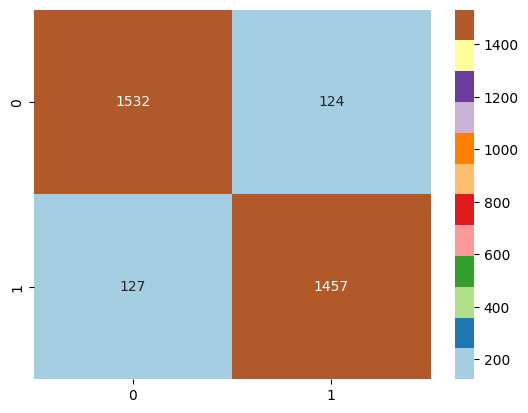

In [51]:
lgb_report = confusion_matrix(y_test,lgb_preds)

sns.heatmap(lgb_report, annot=True, fmt='g', cmap='Paired')

#improved on predicting non-fraud tansactions